# From cosmology to linear power parameters
We would like to see if we can compress the linear power spectrum information in a handful of parameters.

In [1]:
%matplotlib inline
import numpy as np
import os
import copy
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import camb
from camb import model, initialpower
import fit_pk
import read_genic

### Specify cosmological models

In [2]:
read_from_genic=False
if read_from_genic:
    # read cosmology from GenIC file
    cosmo_genic = 'param_keir.genic'
    cosmo_dict = read_genic.camb_from_genic(cosmo_genic)
    #print(cosmo_dict)
    pars = fit_pk.get_cosmology(cosmo_dict)
else:
    # setup your favorite, crazy model
    pars = fit_pk.get_cosmology(mnu=0.9)

In [3]:
# setup fiducial cosmology
pars_fid = fit_pk.get_cosmology()

### Compress cosmological information into a handful of parameters

We will first test a model with 5 parameters: 3 for the shape, 1 for linear growht and 1 for acceleration.

In [4]:
z_star=3.0
kp_kms=0.009
linP_params_rel=fit_pk.parameterize_cosmology_relative(pars,pars_fid,z_star=z_star,kp_kms=kp_kms)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


We will also test a model with only 2 shape parameters.

In [5]:
linP_params_rel_fixed=copy.deepcopy(linP_params_rel)
linP_params_rel_fixed['df_star']=0
linP_params_rel_fixed['dg_star']=0
linP_params_rel_fixed['linP_ratio_kms'][2]=0.0

### Reconstruct the linear power using the shape parameters and the logarithmic growth rate

In [6]:
# compute first linear power spectra, in velocity units
# output redshifts
zs=[2,3,4,5]
Nz=len(zs)
# these are the power spectra that we would like to recover
k_kms, zs_out, P_kms = fit_pk.get_linP_kms(pars,zs)

Note: redshifts have been re-sorted (earliest first)


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


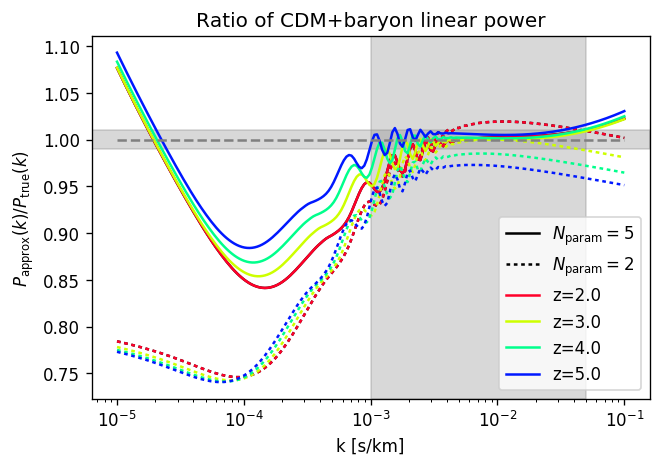

In [7]:
plt.figure()
k=np.logspace(-5,-1,200)
linP_kms_rel=fit_pk.reconstruct_linP_kms_relative(zs,k,pars_fid,linP_params_rel,z_star=z_star,kp_kms=kp_kms)
linP_kms_rel_fixed=fit_pk.reconstruct_linP_kms_relative(zs,k,pars_fid,linP_params_rel_fixed,z_star=z_star,kp_kms=kp_kms)
for iz in range(Nz): 
    z=zs_out[iz]
    col = mpl.cm.gist_rainbow(iz/Nz)
    P_true=np.interp(k,k_kms[iz],P_kms[iz])
    P_rec=linP_kms_rel[iz]
    P_rec_fixed=linP_kms_rel_fixed[iz]
    if iz is 0:
        plt.semilogx(k,P_rec/P_true,'-',color='black',label=r'$N_{\rm param}=5$')
        plt.semilogx(k,P_rec_fixed/P_true,':',color='black',label=r'$N_{\rm param}=2$')
    plt.semilogx(k,P_rec/P_true,'-',color=col,label='z='+str(z))
    plt.semilogx(k,P_rec_fixed/P_true,':',color=col)
plt.semilogx(k,np.ones_like(k),'--',color='gray')
plt.title(r"Ratio of CDM+baryon linear power")
plt.xlabel("k [s/km]")
plt.ylabel(r"$P_{\rm approx}(k) / P_{\rm true}(k)$")
plt.legend()
plt.axhspan(0.99,1.01,alpha=0.3, color='gray')
plt.axvspan(0.001,0.05,alpha=0.3, color='gray')

### Redo exercice, but fitting each cosmology individually

In [8]:
linP_params=fit_pk.parameterize_cosmology(pars,z_star=z_star,kp_kms=kp_kms)
print('input cosmology',linP_params)

Note: redshifts have been re-sorted (earliest first)
input cosmology {'f_star': 0.94696610965978101, 'g_star': 0.9706268150463339, 'linP_kms': poly1d([ -0.10082324,  -2.32271413,  15.71734369])}


In [9]:
linP_params_fid=fit_pk.parameterize_cosmology(pars_fid,z_star=z_star,kp_kms=kp_kms)
print('fiducial cosmology',linP_params_fid)

Note: redshifts have been re-sorted (earliest first)
fiducial cosmology {'f_star': 0.97891840883256409, 'g_star': 0.9679033230853668, 'linP_kms': poly1d([ -0.1078432 ,  -2.30899083,  16.06504524])}


In [12]:
linP_kms=fit_pk.reconstruct_linP_kms(zs,k,pars_fid,linP_params,z_star=z_star,kp_kms=kp_kms)
linP_kms_rel=fit_pk.reconstruct_linP_kms_relative(zs,k,pars_fid,linP_params_rel,z_star=z_star,kp_kms=kp_kms)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


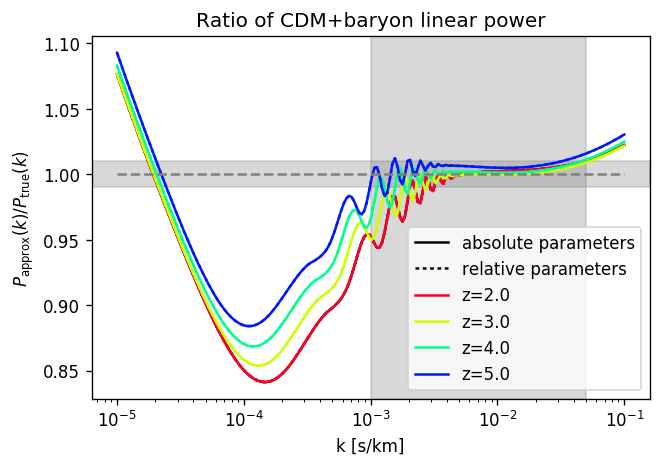

In [13]:
plt.figure()
k=np.logspace(-5,-1,200)
for iz in range(Nz): 
    z=zs_out[iz]
    col = mpl.cm.gist_rainbow(iz/Nz)
    P_true=np.interp(k,k_kms[iz],P_kms[iz])
    P_rec=linP_kms[iz]
    P_rec_rel=linP_kms_rel[iz]
    if iz is 0:
        plt.semilogx(k,P_rec/P_true,'-',color='black',label='absolute parameters')
        plt.semilogx(k,P_rec_rel/P_true,':',color='black',label='relative parameters')
    plt.semilogx(k,P_rec/P_true,'-',color=col,label='z='+str(z))
    plt.semilogx(k,P_rec_rel/P_true,':',color=col)
plt.semilogx(k,np.ones_like(k),'--',color='gray')
plt.title(r"Ratio of CDM+baryon linear power")
plt.xlabel("k [s/km]")
plt.ylabel(r"$P_{\rm approx}(k) / P_{\rm true}(k)$")
plt.legend()
plt.axhspan(0.99,1.01,alpha=0.3, color='gray')
plt.axvspan(0.001,0.05,alpha=0.3, color='gray')